
## The Classic XOR problem to motivate NNs


In [1]:

import tensorflow as tf


In [2]:
!pip install scikit-learn
!pip install tensorflow_datasets
!pip install matplotlib

In [3]:


import numpy as np


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

import tensorflow_datasets as tfds

import matplotlib.pyplot as plt



In [4]:

'''
iris = tfds.load('iris')
X_train_iris = iris['train']
print(X_train_iris.shape)
'''


"\niris = tfds.load('iris')\nX_train_iris = iris['train']\nprint(X_train_iris.shape)\n"

In [5]:
tf.random.set_seed(1)
np.random.seed(1)

In [6]:

X = np.random.uniform(  low=-1, high=1, size=(200, 2)   )


In [7]:
X.shape

(200, 2)

In [8]:
X

array([[-1.65955991e-01,  4.40648987e-01],
       [-9.99771250e-01, -3.95334855e-01],
       [-7.06488218e-01, -8.15322810e-01],
       [-6.27479577e-01, -3.08878546e-01],
       [-2.06465052e-01,  7.76334680e-02],
       [-1.61610971e-01,  3.70439001e-01],
       [-5.91095501e-01,  7.56234873e-01],
       [-9.45224814e-01,  3.40935020e-01],
       [-1.65390395e-01,  1.17379657e-01],
       [-7.19226123e-01, -6.03797022e-01],
       [ 6.01489137e-01,  9.36523151e-01],
       [-3.73151644e-01,  3.84645231e-01],
       [ 7.52778305e-01,  7.89213327e-01],
       [-8.29911577e-01, -9.21890434e-01],
       [-6.60339161e-01,  7.56285007e-01],
       [-8.03306332e-01, -1.57784750e-01],
       [ 9.15779060e-01,  6.63305699e-02],
       [ 3.83754228e-01, -3.68968738e-01],
       [ 3.73001855e-01,  6.69251344e-01],
       [-9.63423445e-01,  5.00288630e-01],
       [ 9.77722178e-01,  4.96331309e-01],
       [-4.39112016e-01,  5.78558657e-01],
       [-7.93547987e-01, -1.04212948e-01],
       [ 8.

In [9]:
y = np.ones(   len(X)    ) 

In [10]:
y.shape

(200,)

In [11]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:

## XOR data

y[  X[:, 0] * X[:, 1] < 0   ] = 0


In [13]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.])

In [14]:
print(y.shape)
print(X.shape)

(200,)
(200, 2)


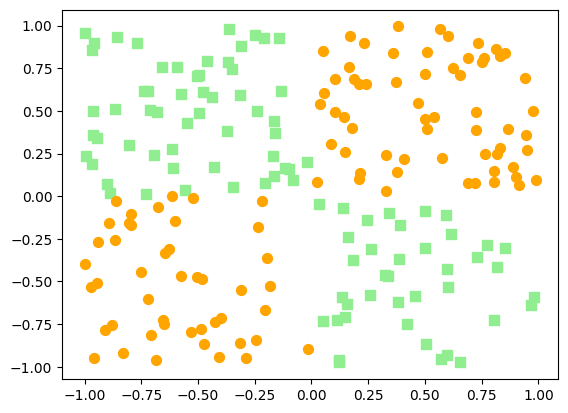

In [15]:


## plt.scatter(X[:, 0], X[:, 1] )


plt.scatter(X[y==0,0],
            X[y==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='class0')
plt.scatter(X[y==1,0],
            X[y==1,1],
            s=50,
            c='orange',
            marker='o',
            label='class1')
plt.show()


In [16]:


X_train = X[:100, :]
y_train = y[:100]

X_test  = X[100:, :]
y_test  = y[100:]



## logistic regression

* no hidden layers


In [17]:



model = tf.keras.Sequential()
model.add(
             tf.keras.layers.Dense(
                                      units=1,
                                      input_shape=(2, ),
                                      activation='sigmoid'
                                  )

)


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [19]:

model.compile(
                 optimizer=tf.keras.optimizers.SGD(),
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics=[tf.keras.metrics.BinaryAccuracy()]

             )


In [20]:

history = model.fit(
                       X_train,
                       y_train,
                       validation_data=(X_test, y_test),
                       epochs=200,
                       batch_size=2,
                       verbose=1
                   )



Epoch 1/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6990 - binary_accuracy: 0.5600 - val_loss: 0.6710 - val_binary_accuracy: 0.5800
Epoch 2/200
50/50 [==============================] - 0s 1ms/step - loss: 0.6971 - binary_accuracy: 0.5600 - val_loss: 0.6708 - val_binary_accuracy: 0.5900
Epoch 3/200
50/50 [==============================] - 0s 1ms/step - loss: 0.6955 - binary_accuracy: 0.5600 - val_loss: 0.6707 - val_binary_accuracy: 0.5900
Epoch 4/200
50/50 [==============================] - 0s 1ms/step - loss: 0.6941 - binary_accuracy: 0.5700 - val_loss: 0.6707 - val_binary_accuracy: 0.6000
Epoch 5/200
50/50 [==============================] - 0s 1ms/step - loss: 0.6930 - binary_accuracy: 0.5800 - val_loss: 0.6708 - val_binary_accuracy: 0.6100
Epoch 6/200
50/50 [==============================] - 0s 1ms/step - loss: 0.6921 - binary_accuracy: 0.5800 - val_loss: 0.6710 - val_binary_accuracy: 0.6100
Epoch 7/200
50/50 [==============================] - 0s 2ms/step - los

50/50 [==============================] - 0s 2ms/step - loss: 0.6857 - binary_accuracy: 0.6500 - val_loss: 0.6780 - val_binary_accuracy: 0.7100
Epoch 54/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6859 - binary_accuracy: 0.6200 - val_loss: 0.6780 - val_binary_accuracy: 0.7100
Epoch 55/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6858 - binary_accuracy: 0.6300 - val_loss: 0.6781 - val_binary_accuracy: 0.7100
Epoch 56/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6858 - binary_accuracy: 0.6500 - val_loss: 0.6781 - val_binary_accuracy: 0.7100
Epoch 57/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6857 - binary_accuracy: 0.6500 - val_loss: 0.6782 - val_binary_accuracy: 0.7100
Epoch 58/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6859 - binary_accuracy: 0.6400 - val_loss: 0.6782 - val_binary_accuracy: 0.7100
Epoch 59/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6

50/50 [==============================] - 0s 2ms/step - loss: 0.6857 - binary_accuracy: 0.6600 - val_loss: 0.6788 - val_binary_accuracy: 0.7100
Epoch 106/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6856 - binary_accuracy: 0.6700 - val_loss: 0.6788 - val_binary_accuracy: 0.7100
Epoch 107/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6858 - binary_accuracy: 0.6600 - val_loss: 0.6788 - val_binary_accuracy: 0.7100
Epoch 108/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6857 - binary_accuracy: 0.6600 - val_loss: 0.6788 - val_binary_accuracy: 0.7100
Epoch 109/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6857 - binary_accuracy: 0.6100 - val_loss: 0.6788 - val_binary_accuracy: 0.7100
Epoch 110/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6857 - binary_accuracy: 0.6300 - val_loss: 0.6789 - val_binary_accuracy: 0.7100
Epoch 111/200
50/50 [==============================] - 0s 2ms/step - los

50/50 [==============================] - 0s 2ms/step - loss: 0.6858 - binary_accuracy: 0.6500 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 158/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6857 - binary_accuracy: 0.6600 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 159/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6858 - binary_accuracy: 0.6700 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 160/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6859 - binary_accuracy: 0.6200 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 161/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6858 - binary_accuracy: 0.6700 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 162/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6858 - binary_accuracy: 0.6500 - val_loss: 0.6789 - val_binary_accuracy: 0.7100
Epoch 163/200
50/50 [==============================] - 0s 2ms/step - los

In [21]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


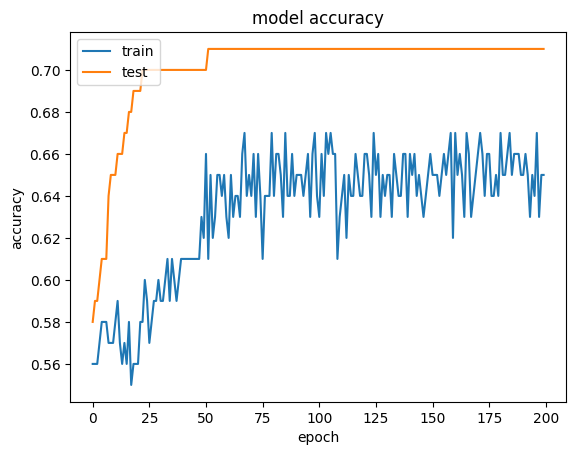

In [22]:



# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

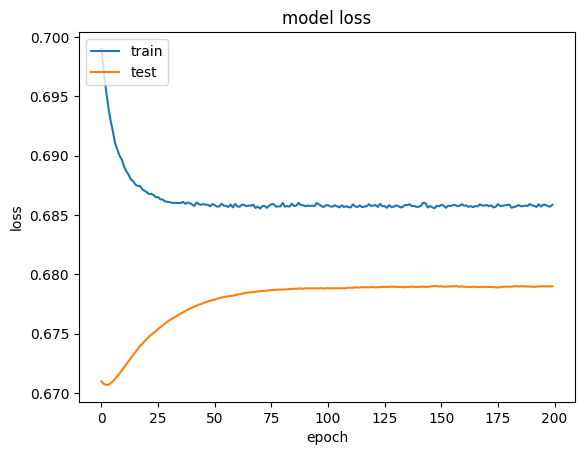

In [23]:



# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## DNN

* deep neural net with 3 hidden layers


In [24]:



model = tf.keras.Sequential()
model.add(  tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model.add(  tf.keras.layers.Dense(units=4, activation='relu'))
model.add(  tf.keras.layers.Dense(units=4, activation='relu'))
model.add(  tf.keras.layers.Dense(units=1, activation='sigmoid'))



In [25]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [26]:


model.compile(
                optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[   tf.keras.metrics.BinaryAccuracy()   ]

             )


In [27]:

hist = model.fit(
                    X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs=200,
                    batch_size=2,
                    verbose=1

                )


Epoch 1/200
50/50 [==============================] - 1s 5ms/step - loss: 0.7007 - binary_accuracy: 0.4700 - val_loss: 0.6963 - val_binary_accuracy: 0.6700
Epoch 2/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6927 - binary_accuracy: 0.6100 - val_loss: 0.6910 - val_binary_accuracy: 0.6500
Epoch 3/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6888 - binary_accuracy: 0.6400 - val_loss: 0.6882 - val_binary_accuracy: 0.6400
Epoch 4/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6868 - binary_accuracy: 0.6500 - val_loss: 0.6863 - val_binary_accuracy: 0.6200
Epoch 5/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6851 - binary_accuracy: 0.6800 - val_loss: 0.6845 - val_binary_accuracy: 0.6400
Epoch 6/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6834 - binary_accuracy: 0.6700 - val_loss: 0.6827 - val_binary_accuracy: 0.6400
Epoch 7/200
50/50 [==============================] - 0s 2ms/step - los

50/50 [==============================] - 0s 2ms/step - loss: 0.1853 - binary_accuracy: 0.9800 - val_loss: 0.2054 - val_binary_accuracy: 0.9700
Epoch 54/200
50/50 [==============================] - 0s 2ms/step - loss: 0.1765 - binary_accuracy: 0.9800 - val_loss: 0.2083 - val_binary_accuracy: 0.9800
Epoch 55/200
50/50 [==============================] - 0s 2ms/step - loss: 0.1725 - binary_accuracy: 0.9800 - val_loss: 0.1985 - val_binary_accuracy: 0.9800
Epoch 56/200
50/50 [==============================] - 0s 2ms/step - loss: 0.1670 - binary_accuracy: 0.9900 - val_loss: 0.1929 - val_binary_accuracy: 0.9700
Epoch 57/200
50/50 [==============================] - 0s 2ms/step - loss: 0.1613 - binary_accuracy: 0.9900 - val_loss: 0.1861 - val_binary_accuracy: 0.9700
Epoch 58/200
50/50 [==============================] - 0s 2ms/step - loss: 0.1563 - binary_accuracy: 0.9900 - val_loss: 0.1838 - val_binary_accuracy: 0.9700
Epoch 59/200
50/50 [==============================] - 0s 2ms/step - loss: 0.1

50/50 [==============================] - 0s 2ms/step - loss: 0.0667 - binary_accuracy: 0.9900 - val_loss: 0.1023 - val_binary_accuracy: 0.9700
Epoch 106/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0616 - binary_accuracy: 0.9900 - val_loss: 0.1150 - val_binary_accuracy: 0.9800
Epoch 107/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0628 - binary_accuracy: 1.0000 - val_loss: 0.1122 - val_binary_accuracy: 0.9700
Epoch 108/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0588 - binary_accuracy: 1.0000 - val_loss: 0.1040 - val_binary_accuracy: 0.9700
Epoch 109/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0625 - binary_accuracy: 0.9900 - val_loss: 0.1199 - val_binary_accuracy: 0.9800
Epoch 110/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0616 - binary_accuracy: 0.9900 - val_loss: 0.1186 - val_binary_accuracy: 0.9800
Epoch 111/200
50/50 [==============================] - 0s 2ms/step - los

50/50 [==============================] - 0s 2ms/step - loss: 0.0366 - binary_accuracy: 0.9900 - val_loss: 0.1059 - val_binary_accuracy: 0.9700
Epoch 158/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0358 - binary_accuracy: 1.0000 - val_loss: 0.0835 - val_binary_accuracy: 0.9900
Epoch 159/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0369 - binary_accuracy: 1.0000 - val_loss: 0.0774 - val_binary_accuracy: 0.9800
Epoch 160/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0354 - binary_accuracy: 1.0000 - val_loss: 0.1096 - val_binary_accuracy: 0.9600
Epoch 161/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0318 - binary_accuracy: 1.0000 - val_loss: 0.0717 - val_binary_accuracy: 0.9800
Epoch 162/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0393 - binary_accuracy: 0.9900 - val_loss: 0.0756 - val_binary_accuracy: 0.9800
Epoch 163/200
50/50 [==============================] - 0s 2ms/step - los

In [28]:

print(hist.history.keys())



dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


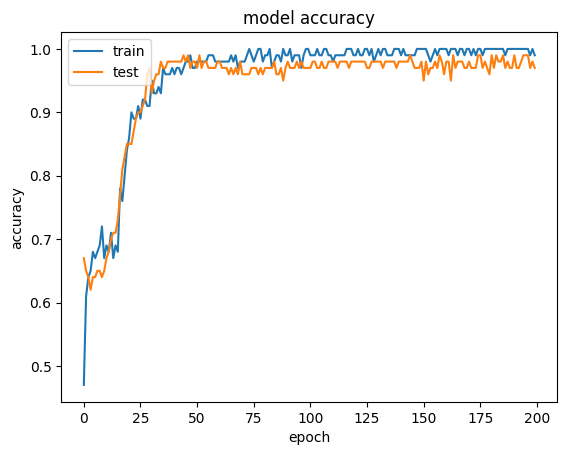

In [29]:


history = hist


# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



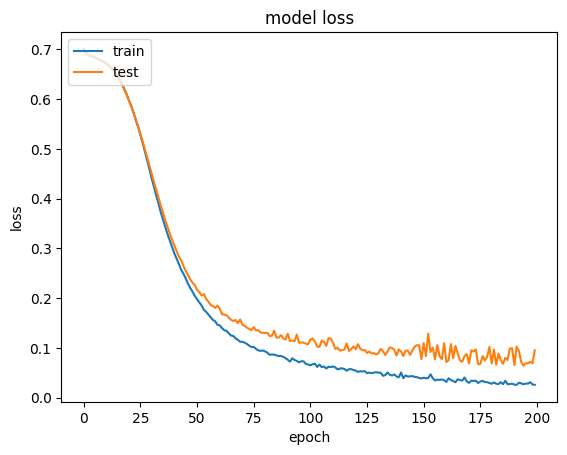

In [30]:

history = hist

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [31]:
model.save ('modelXOR.h5')